In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
Data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
Data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
Data.shape

(1599, 12)

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
Data["quality"].value_counts(ascending=False)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [6]:
Data["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
for i in range(len(Data["quality"])):
    if Data["quality"][i]>2 and Data["quality"][i]<7:
           Data["quality"][i]=0
    else:
        Data["quality"][i]=1
        

In [8]:
Data["quality"]

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [9]:
Data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [10]:
Data["quality"].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [11]:
X=Data.drop("quality",axis=1)

In [12]:
Y=Data["quality"]

In [13]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [14]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [15]:
X.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

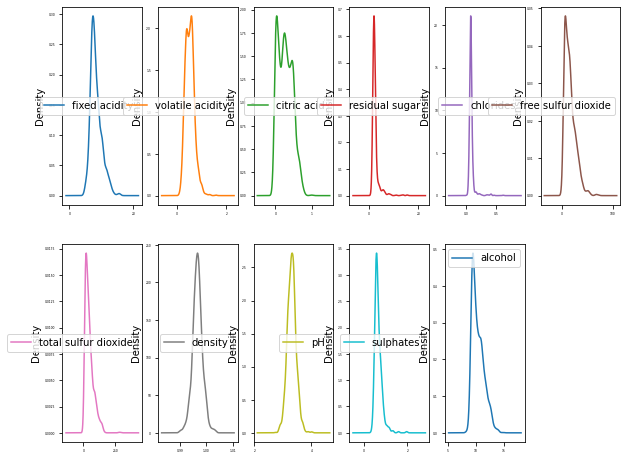

In [16]:
X.plot(kind='kde',subplots=True,layout=(2,6),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show()

In [17]:
X.skew().sort_values(ascending=False)

chlorides               5.680347
residual sugar          4.540655
sulphates               2.428672
total sulfur dioxide    1.515531
free sulfur dioxide     1.250567
fixed acidity           0.982751
alcohol                 0.860829
volatile acidity        0.671593
citric acid             0.318337
pH                      0.193683
density                 0.071288
dtype: float64

In [18]:
sqrt_transform=np.sqrt(X)

In [19]:
pd.DataFrame(sqrt_transform,columns=X.columns).skew().sort_values(ascending=False)

chlorides               3.708789
residual sugar          2.956763
sulphates               1.554542
alcohol                 0.758751
fixed acidity           0.685006
total sulfur dioxide    0.640439
free sulfur dioxide     0.483344
volatile acidity        0.108355
pH                      0.098786
density                 0.067136
citric acid            -0.533799
dtype: float64

In [20]:
X= pd.DataFrame(sqrt_transform, columns=X.columns)

In [21]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2.720294,0.836660,0.000000,1.378405,0.275681,3.316625,5.830952,0.998899,1.873499,0.748331,3.065942
1,2.792848,0.938083,0.000000,1.612452,0.313050,5.000000,8.185353,0.998399,1.788854,0.824621,3.130495
2,2.792848,0.871780,0.200000,1.516575,0.303315,3.872983,7.348469,0.998499,1.805547,0.806226,3.130495
3,3.346640,0.529150,0.748331,1.378405,0.273861,4.123106,7.745967,0.998999,1.777639,0.761577,3.130495
4,2.720294,0.836660,0.000000,1.378405,0.275681,3.316625,5.830952,0.998899,1.873499,0.748331,3.065942
...,...,...,...,...,...,...,...,...,...,...,...
1594,2.489980,0.774597,0.282843,1.414214,0.300000,5.656854,6.633250,0.997447,1.857418,0.761577,3.240370
1595,2.428992,0.741620,0.316228,1.483240,0.248998,6.244998,7.141428,0.997557,1.876166,0.871780,3.346640
1596,2.509980,0.714143,0.360555,1.516575,0.275681,5.385165,6.324555,0.997868,1.849324,0.866025,3.316625
1597,2.428992,0.803119,0.346410,1.414214,0.273861,5.656854,6.633250,0.997732,1.889444,0.842615,3.193744


In [22]:
X.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [23]:
log_transform=np.log(X[["chlorides","residual sugar","sulphates"]])

In [24]:
log_transform.skew().sort_values(ascending=False)

residual sugar    1.806864
chlorides         1.745215
sulphates         0.921867
dtype: float64

In [25]:
X[["chlorides","residual sugar","sulphates"]]=pd.DataFrame(log_transform)

In [26]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2.720294,0.836660,0.000000,0.320927,-1.288511,3.316625,5.830952,0.998899,1.873499,-0.289909,3.065942
1,2.792848,0.938083,0.000000,0.477756,-1.161394,5.000000,8.185353,0.998399,1.788854,-0.192831,3.130495
2,2.792848,0.871780,0.200000,0.416455,-1.192983,3.872983,7.348469,0.998499,1.805547,-0.215391,3.130495
3,3.346640,0.529150,0.748331,0.320927,-1.295134,4.123106,7.745967,0.998999,1.777639,-0.272364,3.130495
4,2.720294,0.836660,0.000000,0.320927,-1.288511,3.316625,5.830952,0.998899,1.873499,-0.289909,3.065942
...,...,...,...,...,...,...,...,...,...,...,...
1594,2.489980,0.774597,0.282843,0.346574,-1.203973,5.656854,6.633250,0.997447,1.857418,-0.272364,3.240370
1595,2.428992,0.741620,0.316228,0.394229,-1.390310,6.244998,7.141428,0.997557,1.876166,-0.137218,3.346640
1596,2.509980,0.714143,0.360555,0.416455,-1.288511,5.385165,6.324555,0.997868,1.849324,-0.143841,3.316625
1597,2.428992,0.803119,0.346410,0.346574,-1.295134,5.656854,6.633250,0.997732,1.889444,-0.171245,3.193744


In [27]:
X.skew().sort_values(ascending=False)

residual sugar          1.806864
chlorides               1.745215
sulphates               0.921867
alcohol                 0.758751
fixed acidity           0.685006
total sulfur dioxide    0.640439
free sulfur dioxide     0.483344
volatile acidity        0.108355
pH                      0.098786
density                 0.067136
citric acid            -0.533799
dtype: float64

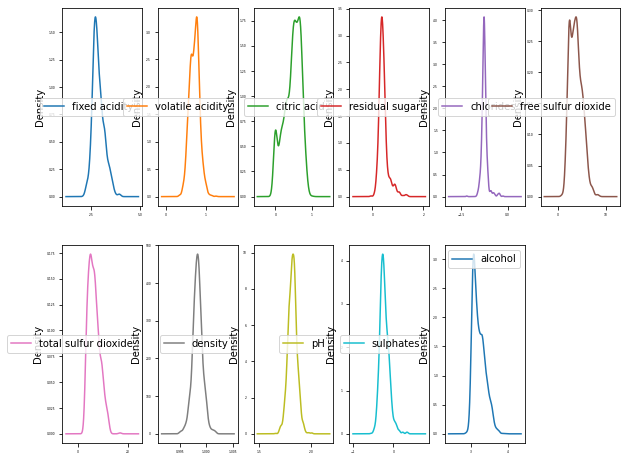

In [28]:
X.plot(kind='kde',subplots=True,layout=(2,6),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show()

In [29]:
X.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.263836,0.620256,0.173174,0.187249,-0.169950,-0.115641,0.672535,-0.696534,0.201919,-0.077498
volatile acidity,-0.263836,1.000000,-0.566852,0.030775,0.118981,0.009403,0.089526,0.033833,0.230515,-0.299998,-0.217841
citric acid,0.620256,-0.566852,1.000000,0.161535,0.152452,-0.046351,0.076331,0.338707,-0.538689,0.302809,0.064751
residual sugar,0.173174,0.030775,0.161535,1.000000,0.117102,0.121695,0.178118,0.417390,-0.089771,0.024800,0.080157
chlorides,0.187249,0.118981,0.152452,0.117102,1.000000,-0.009802,0.068225,0.352060,-0.284536,0.243076,-0.304931
free sulfur dioxide,-0.169950,0.009403,-0.046351,0.121695,-0.009802,1.000000,0.739076,-0.033450,0.085721,0.053049,-0.077127
total sulfur dioxide,-0.115641,0.089526,0.076331,0.178118,0.068225,0.739076,1.000000,0.089866,-0.040745,0.031620,-0.227250
density,0.672535,0.033833,0.338707,0.417390,0.352060,-0.033450,0.089866,1.000000,-0.341278,0.166101,-0.494008
pH,-0.696534,0.230515,-0.538689,-0.089771,-0.284536,0.085721,-0.040745,-0.341278,1.000000,-0.157512,0.203847
sulphates,0.201919,-0.299998,0.302809,0.024800,0.243076,0.053049,0.031620,0.166101,-0.157512,1.000000,0.135641


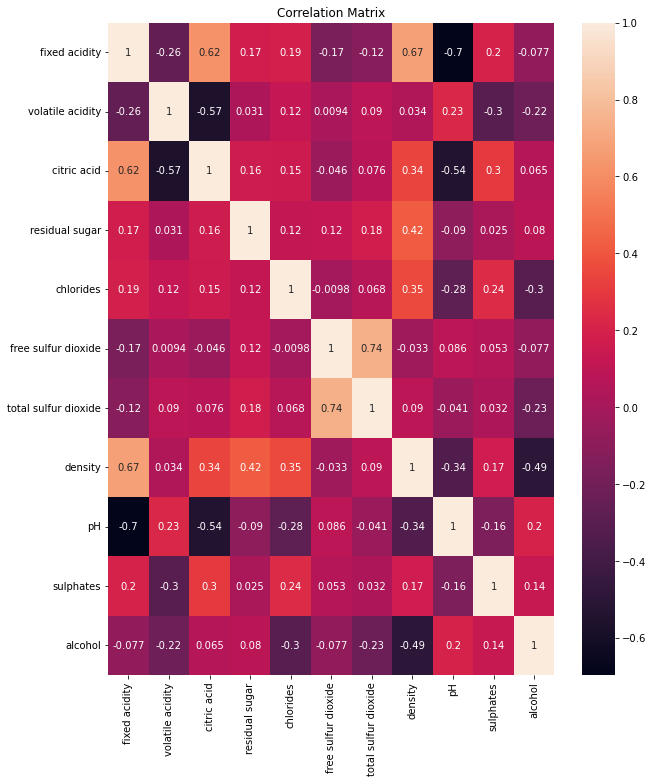

In [30]:
corr_mat=X.corr()
plt.figure(figsize=[10,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

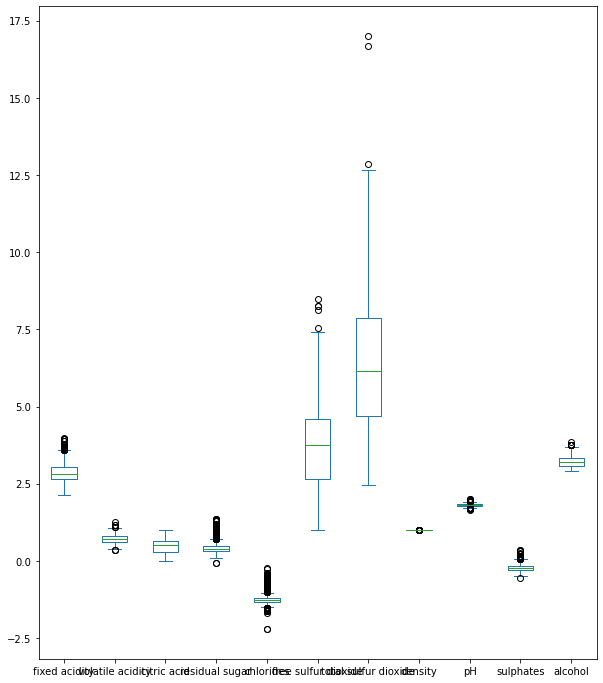

In [31]:
X.plot(kind='box',figsize=(10,12),layout=(4,3))
plt.show()

In [35]:
from scipy.stats import zscore

In [40]:
(np.abs(zscore(X)>3)& (zscore(X)<3)).all()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
dtype: bool

In [37]:
df_new = X[(X.zscore>-3) & (X.zscore<3)]


AttributeError: 'DataFrame' object has no attribute 'zscore'